**Importing Neccessary Libraries and Github Repo**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Uncomment the below code if the notebook is run on Google Colab.
!git clone https://github.com/abirmondal/detect-abusive-comment.git

fatal: destination path 'detect-abusive-comment' already exists and is not an empty directory.


In [ ]:
utils_folder_path = '/content/detect-abusive-comment/src/utils'

import os
os.chdir(utils_folder_path)

import pandas as pd
import model_report as mr
import dataset as ds

In [ ]:
import pickle as pkl
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

**Loading Training, Testing and Validation datasets**

In [ ]:
train_file_loc = '/content/detect-abusive-comment/data/m_dataset_21_9/dataset_12_10/train.csv'
df_train = pd.read_csv(train_file_loc)

test_file_loc = '/content/detect-abusive-comment/data/m_dataset_21_9/dataset_12_10/test.csv'
df_test = pd.read_csv(test_file_loc)

val_file_loc = '/content/detect-abusive-comment/data/m_dataset_21_9/dataset_12_10/val.csv'
df_val = pd.read_csv(val_file_loc)

X_train = df_train['text'].to_list()
Y_train = df_train['hate'].values
X_val = df_val['text'].to_list()
Y_val = df_val['hate'].values
X_test = df_test['text'].to_list()
Y_test = df_test['hate'].values

dataset_details = ds.get_dataset_details()

print('\nHate Counts in Training Set :-', df_train['hate'].value_counts(), sep='\n')
print('\nHate Counts in Testing Set :-', df_test['hate'].value_counts(), sep='\n')
print('\nHate Counts in Validation Set :-',df_val['hate'].value_counts(), sep='\n')

Dataset Details:-
  Dataset Name: m_dataset_21_9
   Total Count: 90345
     Train Set: 63241 ( 70.0% )
      Test Set: 18069 ( 20.0% )
Validation Set:  9035 ( 10.0% )

Hate Counts in Training Set :-
0    36419
1    26822
Name: hate, dtype: int64

Hate Counts in Testing Set :-
0    10406
1     7663
Name: hate, dtype: int64

Hate Counts in Validation Set :-
0    5203
1    3832
Name: hate, dtype: int64


**TF-IDF Vectorization**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

**Implementing binary protocols for serializing and de-serializing (Pickle)**

In [ ]:
def pckl(x,y):
  pkl.dump(x, open(y, 'wb'))
  loaded_svm = pkl.load(open(y, 'rb'))

**Support Vector Machine LinearSVC Model**

In [ ]:
svm = LinearSVC(penalty = 'l2', loss = 'hinge', C = 1, max_iter = 100)
svm.fit(X_train_tfidf, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge', max_iter=100)

In [ ]:
y_pred_svm = svm.predict(X_test_tfidf)
y_pred_svm

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
model_path_svm = '/content/drive/MyDrive/B.Tech. Final Year Project/Offensive Language Detection/toxic-comments-svm.pkl'

In [ ]:
pckl(svm, model_path_svm)

    Accuracy Score:  0.7245558691681886
Weighted Precision:  0.7338906304423546
   Weighted Recall:  0.5499151768236983
          F1-Score:  0.6287206266318539

Classification Report :-
               precision    recall  f1-score   support

           0       0.72      0.85      0.78     10406
           1       0.73      0.55      0.63      7663

    accuracy                           0.72     18069
   macro avg       0.73      0.70      0.70     18069
weighted avg       0.73      0.72      0.72     18069



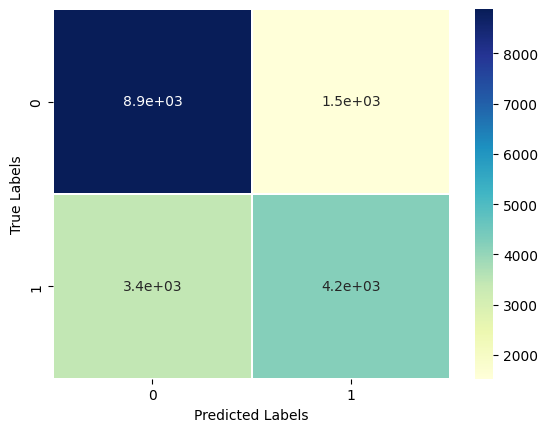

In [ ]:
mr.confusion_mat(Y_test, y_pred_svm)
mr.model_eval(Y_test, y_pred_svm)

**Logistic Regression**

In [ ]:
lr = LogisticRegression(penalty = "l2", C = 1, max_iter=100)
lr.fit(X_train_tfidf, Y_train)

LogisticRegression(C=1)

In [ ]:
y_pred_lr = lr.predict(X_test_tfidf)

In [ ]:
model_path_lr = '/content/drive/MyDrive/B.Tech. Final Year Project/Offensive Language Detection/toxic-comments-lr.pkl'

In [ ]:
pckl(lr, model_path_lr)

    Accuracy Score:  0.7237257180806906
Weighted Precision:  0.7220282626766418
   Weighted Recall:  0.5667493148897299
          F1-Score:  0.6350343617487937

Classification Report :-
               precision    recall  f1-score   support

           0       0.72      0.84      0.78     10406
           1       0.72      0.57      0.64      7663

    accuracy                           0.72     18069
   macro avg       0.72      0.70      0.71     18069
weighted avg       0.72      0.72      0.72     18069



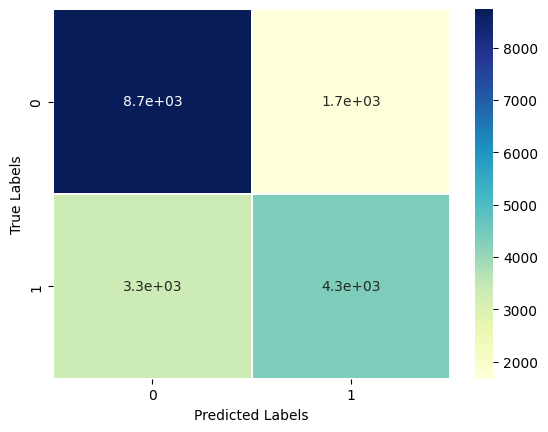

In [ ]:
mr.confusion_mat(Y_test, y_pred_lr)
mr.model_eval(Y_test, y_pred_lr)

**Naive Bayes**

In [ ]:
nb_classifier = MultinomialNB()  # Using Multinomial Naive Bayes
nb_classifier.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)
y_pred_nb

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
model_path_mnb = '/content/drive/MyDrive/B.Tech. Final Year Project/Offensive Language Detection/toxic-comments-mnb.pkl'

In [ ]:
pckl(nb_classifier, model_path_mnb)

    Accuracy Score:  0.716420388510709
Weighted Precision:  0.7486777668952008
   Weighted Recall:  0.4987602766540519
          F1-Score:  0.5986842105263158

Classification Report :-
               precision    recall  f1-score   support

           0       0.70      0.88      0.78     10406
           1       0.75      0.50      0.60      7663

    accuracy                           0.72     18069
   macro avg       0.73      0.69      0.69     18069
weighted avg       0.72      0.72      0.70     18069



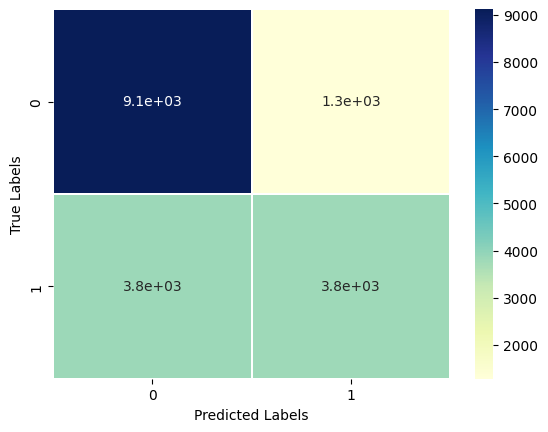

In [ ]:
mr.confusion_mat(Y_test, y_pred_nb)
mr.model_eval(Y_test, y_pred_nb)

**Random Forest**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_tfidf, Y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_classifier.predict(X_test_tfidf)
y_pred_rf

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
model_path_rf = '/content/drive/MyDrive/B.Tech. Final Year Project/Offensive Language Detection/toxic-comments-rf.pkl'

In [ ]:
pckl(rf_classifier, model_path_rf)

    Accuracy Score:  0.7769660744922242
Weighted Precision:  0.7516276492589001
   Weighted Recall:  0.708077776327809
          F1-Score:  0.7292030641042873

Classification Report :-
               precision    recall  f1-score   support

           0       0.79      0.83      0.81     10406
           1       0.75      0.71      0.73      7663

    accuracy                           0.78     18069
   macro avg       0.77      0.77      0.77     18069
weighted avg       0.78      0.78      0.78     18069



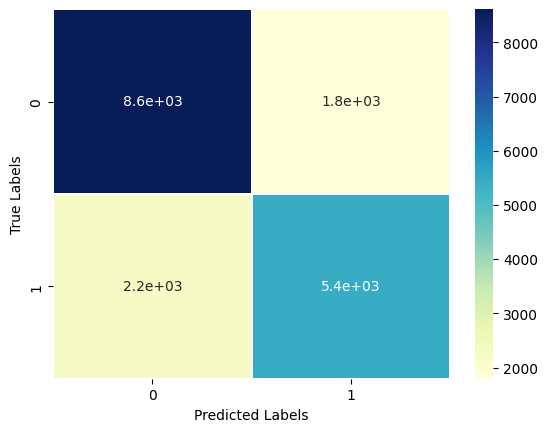

In [ ]:
mr.confusion_mat(Y_test, y_pred_rf)
mr.model_eval(Y_test, y_pred_rf)